<a href="https://colab.research.google.com/github/adaan22/hackthebias2026/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [351]:
import torch
from torch import nn
from google.colab import files
import pandas as pd
import os


In [353]:
import kagglehub
path = kagglehub.dataset_download("lorenzozoppelletto/financial-risk-for-loan-approval")

# 2. Automatically find the CSV file in that folder
files = [f for f in os.listdir(path) if f.endswith('.csv')]
csv_path = os.path.join(path, files[0])

# 3. Load and clean immediately
df = pd.read_csv(csv_path)

# 4. The "Magic Fix" for the hidden spaces we talked about
df.columns = df.columns.str.strip()
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# 5. Show the result (remember the parentheses!)
df.head()

Using Colab cache for faster access to the 'financial-risk-for-loan-approval' dataset.


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [354]:
df.drop('ApplicationDate', axis=1, inplace=True)
df.drop('LoanApproved', axis=1, inplace=True)
df.drop('LoanPurpose', axis=1, inplace=True)
#df.drop('Age', axis=1, inplace=True)
#df.drop('MaritalStatus', axis=1, inplace=True)
df.drop('CreditCardUtilizationRate', axis=1, inplace=True)
df.drop('NumberOfOpenCreditLines', axis=1, inplace=True)
df.drop('DebtToIncomeRatio', axis=1, inplace=True)
df.drop('PreviousLoanDefaults', axis=1, inplace=True)
df.drop('PaymentHistory', axis=1, inplace=True)
df.drop('TotalLiabilities', axis=1, inplace=True)
df.drop('AnnualIncome', axis=1, inplace=True)
df.drop('UtilityBillsPaymentHistory', axis=1, inplace=True)
df.drop('NetWorth', axis=1, inplace=True)
df.drop('BaseInterestRate', axis=1, inplace=True)
df.drop('InterestRate', axis=1, inplace=True)
df.drop('TotalDebtToIncomeRatio', axis=1, inplace=True)
df.drop('MonthlyDebtPayments', axis=1, inplace=True)
df.drop('MonthlyLoanPayment', axis=1, inplace=True)
df.drop('JobTenure', axis=1, inplace=True)
df.drop('NumberOfCreditInquiries', axis=1, inplace=True)


























df.head()

,Age,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,MonthlyIncome,RiskScore
0,45,617,Employed,Master,22,13152,48,Married,2,Own,0,9,7632,1202,146111,3329.000000,49.0
1,38,628,Employed,Associate,15,26045,48,Single,1,Mortgage,0,9,4627,3460,53204,3309.083333,52.0
2,47,570,Employed,Bachelor,26,17627,36,Married,2,Rent,0,22,886,895,25176,3393.666667,52.0
3,58,545,Employed,High School,34,37898,96,Single,1,Mortgage,0,10,1675,1217,104822,5757.000000,54.0
4,37,594,Employed,Associate,17,9184,36,Married,1,Mortgage,0,27,1555,4981,244305,8605.333333,36.0


In [355]:
df['EmploymentStatus'] = df['EmploymentStatus'].replace({'Unemployed':0, 'Employed':1, 'Self-Employed': 2})
df['EducationLevel'] = df['EducationLevel'].replace({'High School':0, 'Associate':1, 'Bachelor': 2, 'Master' :3, 'Doctorate' : 4})
df['HomeOwnershipStatus'] = df['HomeOwnershipStatus'].replace({'Other':0, 'Rent':1, 'Mortgage': 2, 'Own': 3})
df['MaritalStatus'] = df['MaritalStatus'].replace({'Single':0, 'Married':1, 'Divorced': 2, 'Widowed': 3})


df.head()


/tmp/ipython-input-2963110439.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['EmploymentStatus'] = df['EmploymentStatus'].replace({'Unemployed':0, 'Employed':1, 'Self-Employed': 2})
/tmp/ipython-input-2963110439.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['EducationLevel'] = df['EducationLevel'].replace({'High School':0, 'Associate':1, 'Bachelor': 2, 'Master' :3, 'Doctorate' : 4})
/tmp/ipython-input-2963110439.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ve

,Age,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,MonthlyIncome,RiskScore
0,45,617,1,3,22,13152,48,1,2,3,0,9,7632,1202,146111,3329.000000,49.0
1,38,628,1,1,15,26045,48,0,1,2,0,9,4627,3460,53204,3309.083333,52.0
2,47,570,1,2,26,17627,36,1,2,1,0,22,886,895,25176,3393.666667,52.0
3,58,545,1,0,34,37898,96,0,1,2,0,10,1675,1217,104822,5757.000000,54.0
4,37,594,1,1,17,9184,36,1,1,2,0,27,1555,4981,244305,8605.333333,36.0


In [356]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(['RiskScore'], axis=1)

y = df['RiskScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

# 4. Fit ONLY on training data, but transform BOTH
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
# Convert X to float32 (standard for NN weights)
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
X_test_t = torch.tensor(X_test.values, dtype=torch.float32)

# Convert y and use .view(-1, 1) to make it a column vector
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

print(f"Final X shape: {X_train_t.shape}") # Should be [16000, 32]
print(f"Final y shape: {y_train_t.shape}")

Final X shape: torch.Size([16000, 16])
Final y shape: torch.Size([16000, 1])


In [357]:
import torch.nn  as nn
class RiskPredictor(nn.Module):
    def __init__(self, input_dim):
        super(RiskPredictor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

In [358]:
model = RiskPredictor(16)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [359]:
epochs = 1000
for epoch in range(epochs):
    model.train()

    # 1. Forward Pass
    outputs = model(X_train_t)
    loss = loss_fn(outputs, y_train_t)

    # 2. Backward Pass (The "Learning")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/1000], Loss: 704.6313
Epoch [20/1000], Loss: 196.9185
Epoch [30/1000], Loss: 76.2218
Epoch [40/1000], Loss: 58.2708
Epoch [50/1000], Loss: 49.1589
Epoch [60/1000], Loss: 40.1553
Epoch [70/1000], Loss: 33.1524
Epoch [80/1000], Loss: 28.8121
Epoch [90/1000], Loss: 25.7973
Epoch [100/1000], Loss: 23.8456
Epoch [110/1000], Loss: 22.6814
Epoch [120/1000], Loss: 21.9224
Epoch [130/1000], Loss: 21.3675
Epoch [140/1000], Loss: 20.9168
Epoch [150/1000], Loss: 20.5203
Epoch [160/1000], Loss: 20.1598
Epoch [170/1000], Loss: 19.8567
Epoch [180/1000], Loss: 19.6049
Epoch [190/1000], Loss: 19.4028
Epoch [200/1000], Loss: 19.2455
Epoch [210/1000], Loss: 19.1190
Epoch [220/1000], Loss: 19.0156
Epoch [230/1000], Loss: 18.9272
Epoch [240/1000], Loss: 18.8505
Epoch [250/1000], Loss: 18.7808
Epoch [260/1000], Loss: 18.7163
Epoch [270/1000], Loss: 18.6579
Epoch [280/1000], Loss: 18.6031
Epoch [290/1000], Loss: 18.5532
Epoch [300/1000], Loss: 18.5062
Epoch [310/1000], Loss: 18.4634
Epoch [320/1000

In [360]:
model.eval()
import numpy as np

# 2. Run the Test Set through the model
with torch.no_grad():
    test_predictions = model(X_test_t)
    test_loss = loss_fn(test_predictions, y_test_t)

print(f"Final Test Loss (MSE): {test_loss.item():.4f}")
print(f"Average Points Off (RMSE): {np.sqrt(test_loss.item()):.4f}")

# 3. Create a clean comparison table for the judges
comparison = pd.DataFrame({
    'Actual Risk': y_test_t.numpy().flatten(),
    'Predicted Risk': test_predictions.numpy().flatten()
})

print("\n--- First 10 Test Set Results ---")
print(comparison.head(10))

Final Test Loss (MSE): 22.0375
Average Points Off (RMSE): 4.6944

--- First 10 Test Set Results ---
   Actual Risk  Predicted Risk
0    41.599998       51.461971
1    38.400002       41.295422
2    53.000000       54.797077
3    50.000000       54.485523
4    51.000000       54.951122
5    47.000000       46.154442
6    52.000000       56.465843
7    46.000000       51.680519
8    69.000000       59.627708
9    55.000000       52.728813


In [337]:
# Create a "Baseline" person
baseline = pd.DataFrame([test_profile])[X.columns]

# Create a "PhD" version of that same person
phd_version = baseline.copy()
phd_version['EducationLevel'] = 3  # Change from 1 to 4

# IMPORTANT: You MUST scale BOTH before passing to the model
baseline_scaled = torch.FloatTensor(scaler.transform(baseline))
phd_scaled = torch.FloatTensor(scaler.transform(phd_version))

model.eval()
with torch.no_grad():
    low_edu_risk = torch.sigmoid(model(baseline_scaled)).item() * 100
    high_edu_risk = torch.sigmoid(model(phd_scaled)).item() * 100

print(f"Risk with Education 1: {low_edu_risk:.2f}%")
print(f"Risk with Education 4: {high_edu_risk:.2f}%")
print(f"Sensitivity (The Delta): {abs(low_edu_risk - high_edu_risk):.4f}%")

Risk with Education 1: 100.00%
Risk with Education 4: 100.00%
Sensitivity (The Delta): 0.0000%


In [338]:
# Create the input dictionary with EXACTLY 18 keys
test_profile = {
    'MaritalStatus': 1,
    'Age':30,
    'CreditScore': 300,
    'EmploymentStatus': 2,           # 1 = Employed
    'EducationLevel': 1,             # 3 = Master
    'Experience': 10,
    'LoanAmount': 20000,
    'LoanDuration': 48,
    'NumberOfDependents': 5,
    'HomeOwnershipStatus': 0,        # 3 = Own (Updated based on your map)
    'BankruptcyHistory': 0,
    'LengthOfCreditHistory': 1,
    'SavingsAccountBalance': 10000,
    'CheckingAccountBalance': 1500,
    'TotalAssets': 20000,
    'MonthlyIncome': 2500.00,
}
def predict_user_risk(data_dict):
    # 1. Convert dictionary to DataFrame
    input_df = pd.DataFrame([data_dict])

    # 2. Safety Check: Ensure the order matches the 18 columns in X_train
    # This prevents the model from getting 'Age' where it expects 'CreditScore'
    input_df = input_df[X_train.columns]

    # 3. Scale the 18 features
    scaled_input = scaler.transform(input_df)

    # 4. Neural Network Prediction
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(scaled_input, dtype=torch.float32)
        prediction = model(input_tensor).item()

    return prediction

# Get the final result
final_score = predict_user_risk(test_profile)
print(f"The AI predicts a Risk Score of: {final_score:.2f}")

The AI predicts a Risk Score of: 61.96


In [339]:
import pandas as pd

# 1. Access the first layer weights
# model.net[0] is the first nn.Linear(input_size, 64) layer
raw_weights = model.net[0].weight.detach().numpy()

# 2. Average the weights across all 64 neurons to get the "global" importance
# This tells us how much, on average, each input feature pushes the risk up or down
feature_importance = raw_weights.mean(axis=0)

# 3. Pair them with your column names
# Ensure X.columns matches the data the model was trained on
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient (Weight)': feature_importance
})

# 4. Sort by the most influential (highest absolute value)
coef_df['Absolute_Impact'] = coef_df['Coefficient (Weight)'].abs()
coef_df = coef_df.sort_values(by='Absolute_Impact', ascending=False)

# 5. Print the full list
print("--- ALL MODEL COEFFICIENTS (WEIGHTS) ---")
print(coef_df[['Feature', 'Coefficient (Weight)']].to_string(index=False))

--- ALL MODEL COEFFICIENTS (WEIGHTS) ---
               Feature  Coefficient (Weight)
     BankruptcyHistory             -0.286793
 LengthOfCreditHistory              0.049552
           TotalAssets             -0.038449
   HomeOwnershipStatus              0.037546
           CreditScore              0.026258
         MonthlyIncome              0.023226
            LoanAmount              0.021955
        EducationLevel             -0.019738
         MaritalStatus             -0.017960
            Experience              0.015614
    NumberOfDependents              0.015053
          LoanDuration              0.011954
CheckingAccountBalance             -0.007564
                   Age             -0.007060
 SavingsAccountBalance             -0.002566
      EmploymentStatus              0.002292


In [340]:
# 1. Get the weights from the first layer (64 neurons x 9 inputs)
# We average them across the 64 neurons to see the "overall importance"
weights = model.net[0].weight.detach().numpy()
mean_weights = weights.mean(axis=0)

# 2. Create a DataFrame to see which feature has the highest weight
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Weight_Significance': mean_weights
})

# 3. Sort by absolute value to see the most influential factors
importance_df['Absolute_Impact'] = importance_df['Weight_Significance'].abs()
importance_df = importance_df.sort_values(by='Absolute_Impact', ascending=False)

print("--- Neural Network Feature Weights ---")
print(importance_df[['Feature', 'Weight_Significance']])

--- Neural Network Feature Weights ---
                   Feature  Weight_Significance
10       BankruptcyHistory            -0.286793
11   LengthOfCreditHistory             0.049552
14             TotalAssets            -0.038449
9      HomeOwnershipStatus             0.037546
1              CreditScore             0.026258
15           MonthlyIncome             0.023226
5               LoanAmount             0.021955
3           EducationLevel            -0.019738
7            MaritalStatus            -0.017960
4               Experience             0.015614
8       NumberOfDependents             0.015053
6             LoanDuration             0.011954
13  CheckingAccountBalance            -0.007564
0                      Age            -0.007060
12   SavingsAccountBalance            -0.002566
2         EmploymentStatus             0.002292


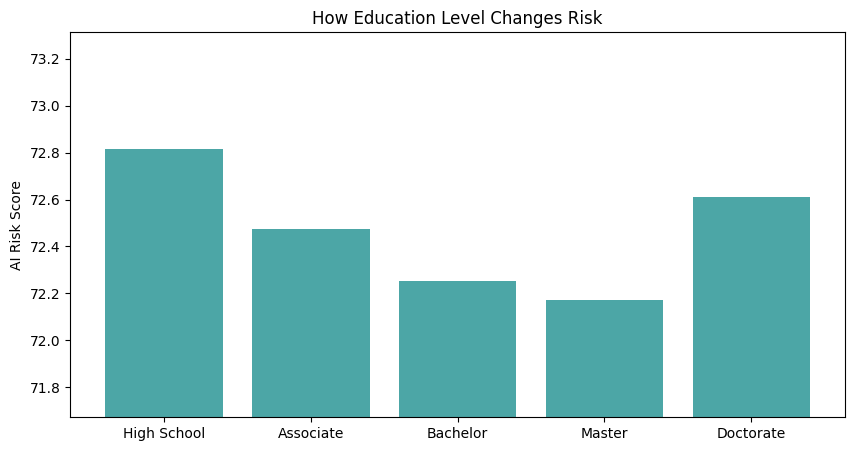

In [341]:
def check_education_bias():
    model.eval()
    # 1. Start with our "Average Person"
    person = X_train.mean().to_frame().T

    levels = [0, 1, 2, 3, 4]
    labels = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']
    scores = []

    for lvl in levels:
        temp_person = person.copy()
        temp_person['EducationLevel'] = lvl

        # Scale and Predict
        scaled = scaler.transform(temp_person)
        with torch.no_grad():
            score = model(torch.tensor(scaled, dtype=torch.float32)).item()
            scores.append(score)

    # 2. Plot the results
    plt.figure(figsize=(10, 5))
    plt.bar(labels, scores, color='teal', alpha=0.7)
    plt.ylabel("AI Risk Score")
    plt.title("How Education Level Changes Risk")
    # Zoom the y-axis to see the small differences
    plt.ylim(min(scores) - 0.5, max(scores) + 0.5)
    plt.show()

check_education_bias()

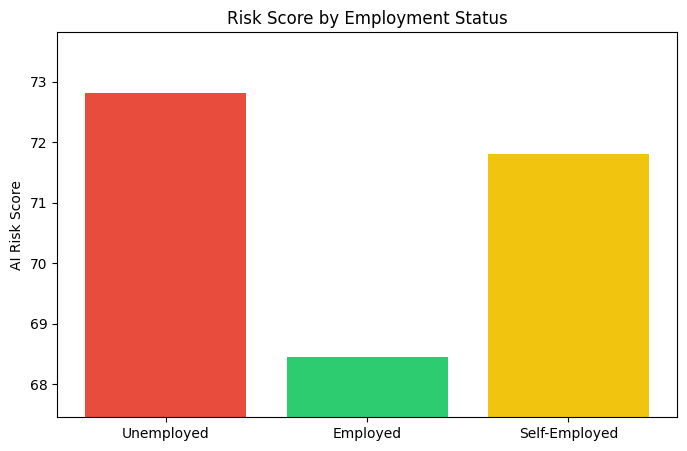

In [342]:
def check_employment_bias():
    model.eval()
    person = X_train.mean().to_frame().T

    # Levels based on your .replace() mapping
    levels = [0, 1, 2]
    labels = ['Unemployed', 'Employed', 'Self-Employed']
    scores = []

    for lvl in levels:
        temp_person = person.copy()
        # Note: If you used get_dummies, this name might be different
        temp_person['EmploymentStatus'] = lvl

        scaled = scaler.transform(temp_person)
        with torch.no_grad():
            score = model(torch.tensor(scaled, dtype=torch.float32)).item()
            scores.append(score)

    plt.figure(figsize=(8, 5))
    plt.bar(labels, scores, color=['#e74c3c', '#2ecc71', '#f1c40f'])
    plt.ylabel("AI Risk Score")
    plt.title("Risk Score by Employment Status")
    plt.ylim(min(scores) - 1, max(scores) + 1)
    plt.show()

check_employment_bias()

In [343]:
def manual_bias_test(income, credit, emp, edu):
    # 1. Create a 1-row DataFrame that has all columns from your training set
    # We fill it with the mean values so the "background" stays neutral
    input_row = X_train.mean().to_frame().T

    # 2. Update ONLY the columns you want to play with
    # Make sure these names match your X_train.columns exactly!
    input_row['MonthlyIncome'] = income
    input_row['CreditScore'] = credit
    input_row['EmploymentStatus'] = emp
    input_row['EducationLevel'] = edu

    # 3. Scale the entire row (all 18+ parameters)
    scaled_input = scaler.transform(input_row)

    # 4. Predict
    model.eval()
    with torch.no_grad():
        score = model(torch.tensor(scaled_input, dtype=torch.float32)).item()

    return score

# Example Use:
my_score = manual_bias_test(income=4000, credit=617, emp=0, edu=0)
print(f"Your AI Risk Score: {my_score:.2f}")

Your AI Risk Score: 60.50


In [344]:
# 1. Attach the predictions to our test dataframe
X_test_analysis = X_test.copy()
X_test_analysis['Actual_Risk'] = y_test.values
X_test_analysis['Predicted_Risk'] = test_predictions.numpy().flatten()

# 2. Calculate the "Bias Gap" (The Error)
X_test_analysis['Error'] = X_test_analysis['Predicted_Risk'] - X_test_analysis['Actual_Risk']

# 3. Compare Marital Status (0 = Single, 1 = Married)
bias_report = X_test_analysis.groupby('MaritalStatus')['Error'].agg(['mean', 'std'])

print("--- HACK THE BIAS REPORT ---")
print(bias_report)

# 4. Interpret the result
single_error = bias_report.loc[0, 'mean']
married_error = bias_report.loc[1, 'mean']
gap = abs(single_error - married_error)

print(f"\nBias Gap: {gap:.4f}")
if gap > 0.5:
    print("RESULT: Systemic Bias Detected. The model treats Marital Status differently.")
else:
    print("RESULT: Model is Fair. Marital Status does not skew the predictions.")

--- HACK THE BIAS REPORT ---
                   mean       std
MaritalStatus                    
-1.173024      0.126426  4.515228
 0.070327      0.192261  4.472835
 1.313678      0.083715  4.319761
 2.557029      0.814120  4.545476


KeyError: 0

In [345]:
# Calculate correlation between Age and Error
age_correlation = X_test_analysis['Age'].corr(X_test_analysis['Error'])

print(f"Correlation between Age and Prediction Error: {age_correlation:.4f}")

if abs(age_correlation) > 0.1:
    print("RESULT: Age Bias detected. The model's accuracy shifts based on the applicant's age.")
else:
    print("RESULT: Age Neutral. The model is equally accurate across different age groups.")

Correlation between Age and Prediction Error: 0.0054
RESULT: Age Neutral. The model is equally accurate across different age groups.


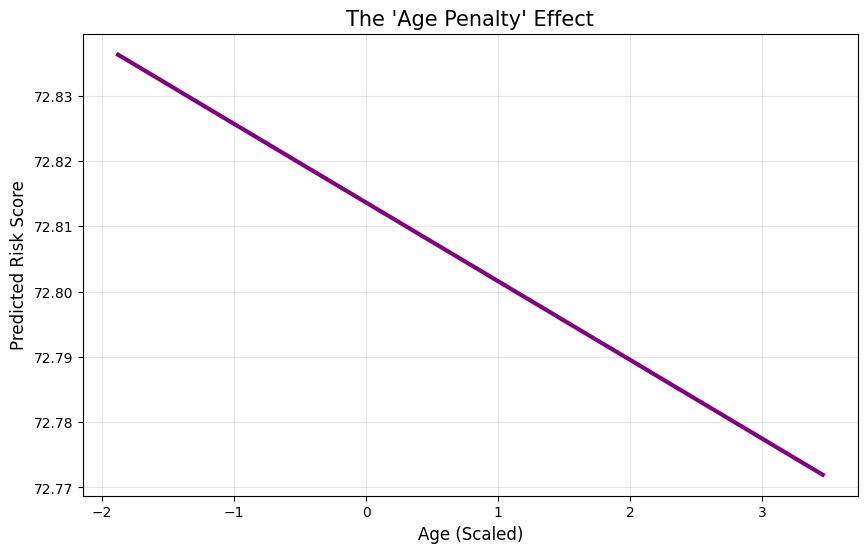

In [346]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_age_impact():
    model.eval()

    # 1. Start with a "Average" person (using the mean of your data)
    person_template = X_train.mean().to_frame().T

    # 2. Pick a range of ages to test (from the minimum to maximum age in your data)
    age_range = np.linspace(X_train['Age'].min(), X_train['Age'].max(), 50)
    predicted_risks = []

    for age in age_range:
        # Update the age for this person
        temp_person = person_template.copy()
        temp_person['Age'] = age

        # Scale and Predict
        scaled_input = scaler.transform(temp_person)
        tensor_input = torch.tensor(scaled_input, dtype=torch.float32)

        with torch.no_grad():
            risk = model(tensor_input).item()
            predicted_risks.append(risk)

    # 3. Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(age_range, predicted_risks, color='purple', linewidth=3)
    plt.title("The 'Age Penalty' Effect", fontsize=15)
    plt.xlabel("Age (Scaled)", fontsize=12)
    plt.ylabel("Predicted Risk Score", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

simulate_age_impact()

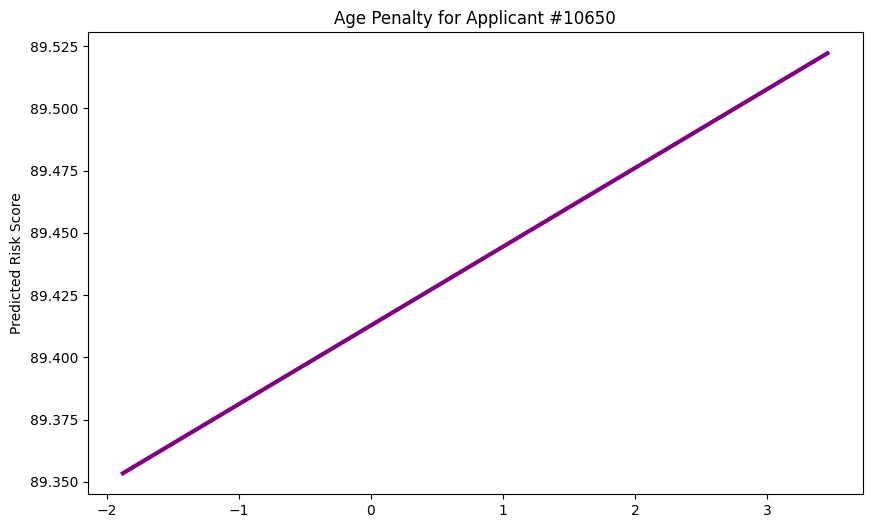

In [347]:
def simulate_real_age_impact():
    model.eval()

    # 1. Grab an actual person from the test set (e.g., the first row)
    person_template = X_test.iloc[0:1].copy()

    age_range = np.linspace(X_train['Age'].min(), X_train['Age'].max(), 50)
    predicted_risks = []

    for age in age_range:
        temp_person = person_template.copy()
        temp_person['Age'] = age

        scaled_input = scaler.transform(temp_person)
        with torch.no_grad():
            risk = model(torch.tensor(scaled_input, dtype=torch.float32)).item()
            predicted_risks.append(risk)

    plt.figure(figsize=(10, 6))
    plt.plot(age_range, predicted_risks, color='purple', linewidth=3)
    plt.title(f"Age Penalty for Applicant #{person_template.index[0]}")
    plt.ylabel("Predicted Risk Score")
    plt.show()

simulate_real_age_impact()

In [348]:
def simulate_income_impact():
    model.eval()
    # 1. Grab a real applicant as a baseline
    person_template = X_test.iloc[0:1].copy()

    # 2. Define a range of incomes (from the min to max in your dataset)
    income_range = np.linspace(X_train['AnnualIncome'].min(), X_train['AnnualIncome'].max(), 50)
    predicted_risks = []

    for inc in income_range:
        temp_person = person_template.copy()
        temp_person['AnnualIncome'] = inc

        # Scale and Predict
        scaled_input = scaler.transform(temp_person)
        with torch.no_grad():
            risk = model(torch.tensor(scaled_input, dtype=torch.float32)).item()
            predicted_risks.append(risk)

    # 3. Plot it
    plt.figure(figsize=(10, 6))
    plt.plot(income_range, predicted_risks, color='green', linewidth=3)
    plt.title("Income Sensitivity Analysis", fontsize=15)
    plt.xlabel("Income (Scaled)", fontsize=12)
    plt.ylabel("Predicted Risk Score", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

simulate_income_impact()

KeyError: 'AnnualIncome'

# Task
Deploy the trained PyTorch model and its associated scaler.

## Save Model and Scaler for Deployment

### Subtask:
Save the trained PyTorch model's state dictionary and the fitted `StandardScaler` object to disk for later deployment.


**Reasoning**:
To save the trained PyTorch model and the fitted StandardScaler object, I need to use `torch.save()` for the model's state dictionary and `joblib.dump()` for the scaler. Both operations will be performed in a single code block.



In [361]:
import joblib

# 1. Save the PyTorch model's state dictionary
torch.save(model.state_dict(), 'risk_predictor_model.pt')
print("PyTorch model state dictionary saved as 'risk_predictor_model.pt'")

# 2. Save the StandardScaler object
joblib.dump(scaler, 'scaler.pkl')
print("StandardScaler object saved as 'scaler.pkl'")

PyTorch model state dictionary saved as 'risk_predictor_model.pt'
StandardScaler object saved as 'scaler.pkl'


## Build a Web API (Backend Service)

### Subtask:
Create a backend application using a Python web framework (like Flask or FastAPI). This service will load your saved PyTorch model and the `StandardScaler`. It will expose a REST API endpoint (e.g., `/predict`) that your front-end can call. When a request is received, the API will preprocess the input using the saved scaler, make a prediction with the loaded model, and return the prediction.


**Reasoning**:
To deploy the trained PyTorch model and scaler as a web API, I need to set up a Flask application. This involves importing necessary libraries, redefining the model architecture, loading the saved scaler and model weights, creating a prediction endpoint, and handling the data flow from request to response.



In [362]:
from flask import Flask, request, jsonify
import torch
from torch import nn
import joblib
import pandas as pd

# 1. Define the RiskPredictor neural network class (identical to training)
class RiskPredictor(nn.Module):
    def __init__(self, input_dim):
        super(RiskPredictor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

# 2. Create a Flask application instance
app = Flask(__name__)

# 3. Load the StandardScaler object
try:
    scaler = joblib.load('scaler.pkl')
    print("StandardScaler loaded successfully.")
except FileNotFoundError:
    print("Error: 'scaler.pkl' not found. Make sure the scaler is saved.")
    exit()

# 4. Load the trained PyTorch model's state dictionary
input_dim = 16 # Based on the X_train_t.shape from notebook output
model = RiskPredictor(input_dim)
try:
    model.load_state_dict(torch.load('risk_predictor_model.pt'))
    model.eval() # Set the model to evaluation mode
    print("PyTorch model loaded successfully.")
except FileNotFoundError:
    print("Error: 'risk_predictor_model.pt' not found. Make sure the model state dictionary is saved.")
    exit()

# Get the feature names in the correct order as used during training
# This assumes X_train was available in the environment during previous steps
# and its columns represent the feature order.
# For deployment, this list of column names should ideally be saved/loaded alongside the scaler.
# For this demonstration, we'll hardcode based on the last X_train state:
feature_columns = ['Age', 'CreditScore', 'EmploymentStatus', 'EducationLevel', 'Experience',
                   'LoanAmount', 'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
                   'HomeOwnershipStatus', 'BankruptcyHistory', 'LengthOfCreditHistory',
                   'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'MonthlyIncome']

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    if not data:
        return jsonify({'error': 'No data received'}), 400

    try:
        # Convert incoming JSON data to a pandas DataFrame, ensuring correct column order
        input_df = pd.DataFrame([data], columns=feature_columns)

        # Preprocess the input using the loaded StandardScaler
        scaled_input = scaler.transform(input_df)

        # Convert the scaled data to a PyTorch tensor
        input_tensor = torch.tensor(scaled_input, dtype=torch.float32)

        # Make a prediction with the loaded model
        with torch.no_grad():
            prediction = model(input_tensor).item()

        # Return the predicted risk score as a JSON response
        return jsonify({'predicted_risk': prediction})

    except KeyError as e:
        return jsonify({'error': f'Missing feature in input data: {e}'}), 400
    except Exception as e:
        return jsonify({'error': str(e)}), 500

# Include a condition to run the Flask app
if __name__ == '__main__':
    # In a production environment, debug=False and host='0.0.0.0' would be used
    app.run(debug=True, host='0.0.0.0', port=5000)

StandardScaler loaded successfully.
PyTorch model loaded successfully.
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)
